In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Family-Income-and-Expenditure.csv')

In [2]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [3]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


Prediction of Food Expenditure
Mean Absolute Error: 14782.884536452984


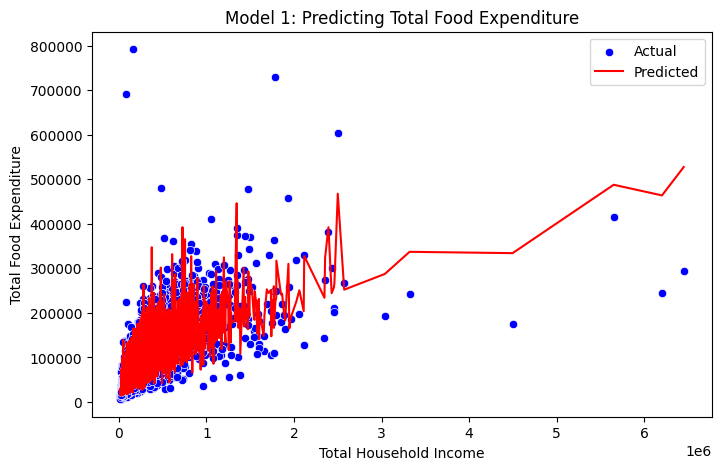

In [23]:
X1 = df[['Total Household Income',
         'Bread and Cereals Expenditure',
         'Total Rice Expenditure',
         'Meat Expenditure']]
y1 = df['Total Food Expenditure']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_pred = model1.predict(X1_test)

print("Prediction of Food Expenditure")
print("Mean Absolute Error:", mean_absolute_error(y1_test, y1_pred))
plt.figure(figsize=(8,5))

sns.scatterplot(x=X1_test['Total Household Income'], y=y1_test, color='blue', label='Actual')

sns.lineplot(x=X1_test['Total Household Income'], y=y1_pred, color='red', label='Predicted')

plt.title("Model 1: Predicting Total Food Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Total Food Expenditure")
plt.legend()
plt.show()

<h1>Insights:</h1>
<h3>1. Higher income households usually have higher total food expenditure.<h3/>
<h3>2. Food spending is not determined by income alone, other factors also strongly influence it.<h3/>

Prediction is it Agricultural Household
Accuracy: 0.6769767721747503


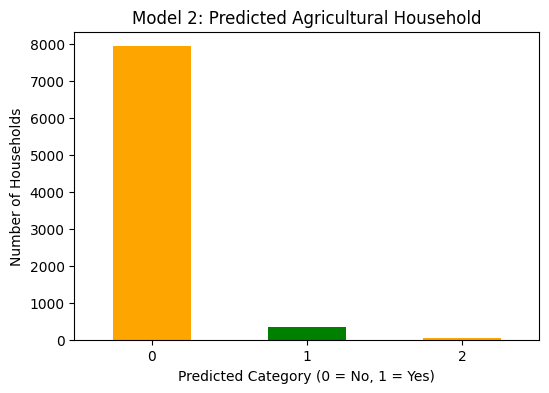

In [24]:
X2 = df[['Total Household Income',
         'Total Food Expenditure',
         'Number of Cellular phone',
         'Number of Motorcycle/Tricycle']]
y2 = df['Agricultural Household indicator']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LogisticRegression(max_iter=1000)
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

print("Prediction is it Agricultural Household")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
pred_df = pd.DataFrame({
    'Actual': y2_test,
    'Predicted': y2_pred
})

plt.figure(figsize=(6,4))
pred_df['Predicted'].value_counts().sort_index().plot(kind='bar', color=['orange','green'])

plt.title("Model 2: Predicted Agricultural Household")
plt.xlabel("Predicted Category (0 = No, 1 = Yes)")
plt.ylabel("Number of Households")
plt.xticks(rotation=0)
plt.show()

<h1>Insights:</h1>
<h3>3. The dataset is dominated by non-agricultural households, and the bargraph reflects that only a small fraction of households are classified as agricultural<h3/>


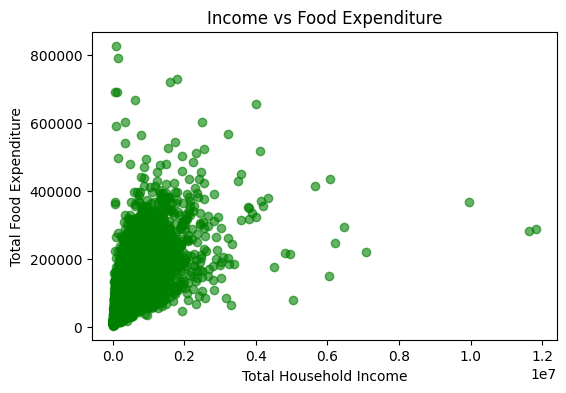

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df['Total Household Income'], df['Total Food Expenditure'], color='green', alpha=0.6)
plt.title('Income vs Food Expenditure')
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.show()


<h1>Insights:</h1>
<h3>4. Non-agricultural households may have higher average income than agricultural households.<h3/>
<h3>5. This can help identify economic disparities and guide support programs for agricultural households.<h3/>

In [7]:
df.head(21).tail(10)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
11,253130,CAR,111250,Wage/Salaries,0,46521,39217,20548,15841,1475,...,0,0,0,0,0,6,0,0,0,0
12,101111,CAR,88523,Enterpreneurial Activities,1,40531,36200,14322,8344,2200,...,0,0,0,0,0,1,0,0,0,0
13,128214,CAR,62262,Enterpreneurial Activities,1,26874,23130,10034,6971,2350,...,0,1,0,0,0,1,0,0,0,1
14,91525,CAR,45487,Other sources of Income,1,19668,16142,5430,6670,1860,...,0,0,0,0,0,0,0,0,0,0
15,171742,CAR,70892,Other sources of Income,0,30594,26788,10336,7900,1503,...,0,0,0,0,0,0,0,0,0,0
16,95385,CAR,83790,Wage/Salaries,1,41701,36200,11226,8806,1434,...,1,0,0,0,0,1,0,0,0,0
17,142843,CAR,85370,Wage/Salaries,0,44006,38213,9840,9317,1231,...,0,0,0,0,0,2,0,0,0,0
18,88170,CAR,64705,Enterpreneurial Activities,1,31984,28659,8048,7625,1625,...,0,0,0,0,0,1,0,0,0,0
19,97018,CAR,82534,Enterpreneurial Activities,1,27283,22503,10162,12370,2380,...,0,0,0,0,0,1,0,0,0,0
20,123015,CAR,73459,Enterpreneurial Activities,1,32692,28520,6638,11734,2120,...,0,0,0,0,0,1,0,0,0,0


PREDICTIVE ANALYSIS RESULTS:
 
Mean Absolute Error (MAE): {mae:.2f}
R² Score: {r2:.3f}
Top 10 Most Influential Features:
Members with age less than 5 year old    3399.380731
Number of Car, Jeep, Van                -1329.603188
Number of Washing Machine                1220.003713
Electricity                              1079.879159
Number of Refrigerator/Freezer            640.206237
Agricultural Household indicator          507.489404
Number of CD/VCD/DVD                      454.258998
Number of Motorized Banca                 430.936719
Number of Television                      430.498074
Number of Cellular phone                  397.739569
dtype: float64


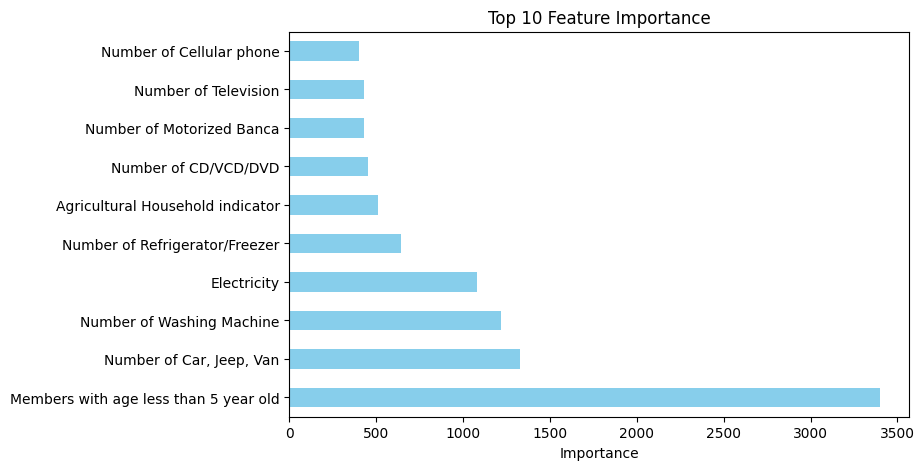

In [30]:
numeric_df = df.select_dtypes(include='number')

X = numeric_df.drop(columns=['Total Food Expenditure'])
y = numeric_df['Total Food Expenditure']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("PREDICTIVE ANALYSIS RESULTS:")
print(" ")
print("Mean Absolute Error (MAE): {mae:.2f}")
print("R² Score: {r2:.3f}")

feature_importance = pd.Series(model.coef_, index=X.columns)
print("Top 10 Most Influential Features:")
print(feature_importance.sort_values(key=abs, ascending=False).head(10))

top = feature_importance.abs().sort_values(ascending=False).head(10)

top.plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance")
plt.gca()
plt.show()

<h1>Insights:</h1>
<h4>6. More appliances = higher purchasing power = higher food expenses.<h3/>
<h4>7. Households with vehicles often have larger families or travel frequently, increasing food needs.<h3/>

Mean Absolute Error (MAE): 5401.20
R² Score: 0.953


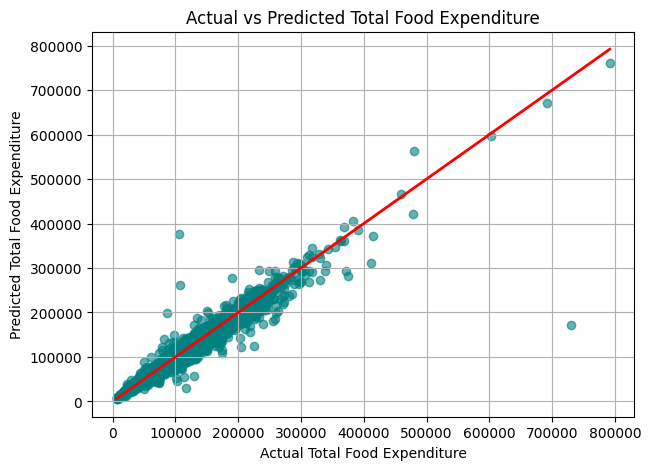

In [10]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2) 
plt.xlabel("Actual Total Food Expenditure")
plt.ylabel("Predicted Total Food Expenditure")
plt.title("Actual vs Predicted Total Food Expenditure")
plt.grid(True)
plt.show()

<h1>Insights:</h1>
<h3>8.The MAE shows on average how far off predictions are from real values, much lower much better <h3/>
<h3>9.Some points are far from the line, meaning the model has trouble with some households.<h3/>

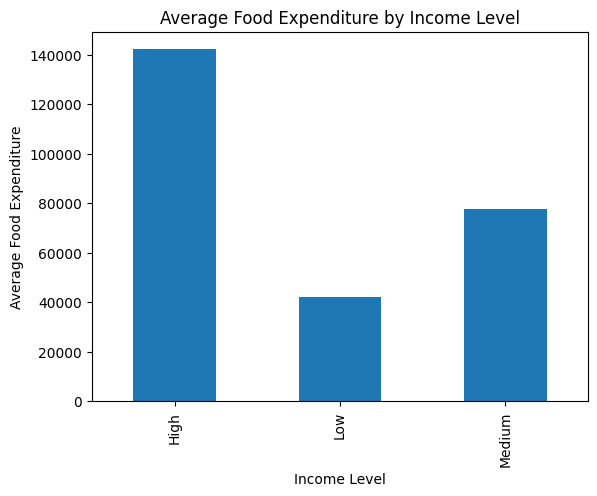

In [18]:

df['Income_Level'] = 'Low'
df.loc[df['Total Household Income'] > 100000, 'Income_Level'] = 'Medium'
df.loc[df['Total Household Income'] > 300000, 'Income_Level'] = 'High'

avg_food = df.groupby('Income_Level', observed=True)['Total Food Expenditure'].mean()

avg_food.plot(kind='bar')
plt.title("Average Food Expenditure by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Average Food Expenditure")
plt.show()


<h1>Insights:</h1>
<h3>10. Households with higher income consistently spend more on food than those with lower income. This indicates that food expenditure tends to increase as financial capacity rises. <h3/>

In [12]:
df.sort_values(by = 'Total Household Income', ascending = False).head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Income_Level
2139,11815988,VI - Western Visayas,286736,Other sources of Income,0,37836,26796,27132,125802,6108,...,1,3,4,0,5,4,1,0,2,High
1238,11639365,VI - Western Visayas,280597,Other sources of Income,0,63182,37800,40551,41956,12475,...,0,4,2,1,8,4,1,0,2,High
30865,9952913,VIII - Eastern Visayas,367772,Enterpreneurial Activities,0,75737,31472,74847,53305,19329,...,1,3,4,2,8,4,2,0,1,High
9382,7082152,VII - Central Visayas,219345,Enterpreneurial Activities,0,17900,10200,31470,29543,7962,...,1,1,2,0,4,2,1,0,3,High
39302,6452314,NCR,293880,Enterpreneurial Activities,2,60920,30430,42479,45374,10446,...,2,5,3,1,5,2,1,0,0,High


Agricultural Household indicator
0    28106
1     9018
2     4420
Name: count, dtype: int64

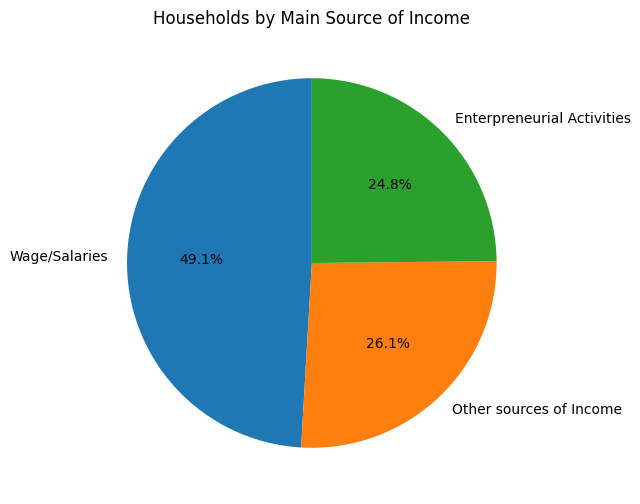

In [21]:
region_counts = df['Region'].value_counts()
income_source_counts = df['Main Source of Income'].value_counts()
agri_counts = df['Agricultural Household indicator'].value_counts()
region_counts
income_source_counts
agri_counts
plt.figure(figsize=(6,6))
plt.pie(income_source_counts, labels=income_source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Households by Main Source of Income')
plt.show()


<h1>Insights:</h1>
<h3>10. If Entrepreneurial Activities dominate, it means most households mainly earn money through self-employment or running small businesses<h3/>
<h3>11. A smaller slice for agricultural households indicates that most households are non-agricultural, meaning the majority earn from other sources.<h3/>
